In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data_cleanup/clean_data.csv")

# analysis - Correlation between model development period and popularity

'model_name', 'created_at', 'download'

In [3]:
col_name = ['model_name','created_at','downloads']
df = df[col_name]
df

,model_name,created_at,downloads
0,albert,2022-03-02,74335
1,albert,2022-03-02,2855580
2,albert,2022-03-02,1491
3,albert,2022-03-02,6875
4,albert,2022-03-02,1449
...,...,...,...
44706,mmervecerit,2024-01-24,11
44707,jsfs11,2024-01-24,18
44708,PetroGPT,2024-01-24,18
44709,tinywell,2024-01-24,25


In [4]:
df['created_at'] = pd.to_datetime(df['created_at'])

df['YM'] = df['created_at'].dt.to_period('M')

month_data = df.groupby('YM').agg({'downloads':'sum'})
month_data['cumulative_downloads'] = month_data['downloads'].cumsum()

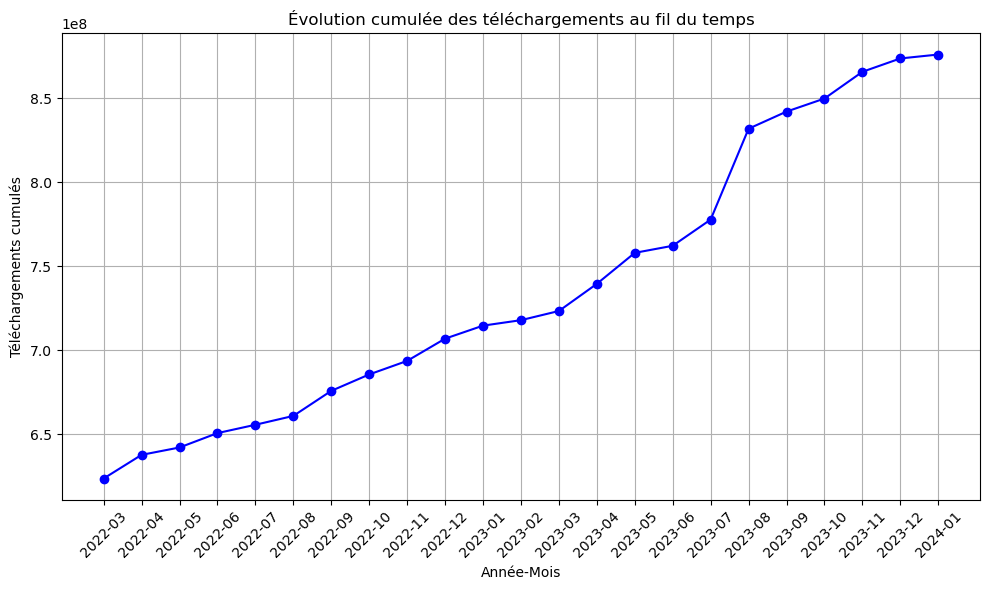

In [5]:
x_values = [str(p) for p in month_data.index]
y_values = month_data['cumulative_downloads'].tolist()

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='blue')
plt.title('Évolution cumulée des téléchargements au fil du temps')
plt.xlabel('Année-Mois')
plt.ylabel('Téléchargements cumulés')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()